In [53]:
import pandas as pd

# Load each dataset
cab_data = pd.read_csv("C:/Users/apurw/OneDrive/Documents/Data Glacier/Week 2/Data/Cab_Data.csv")
customer_id = pd.read_csv("C:/Users/apurw/OneDrive/Documents/Data Glacier/Week 2/Data/Customer_ID.csv")
transaction_id = pd.read_csv("C:/Users/apurw/OneDrive/Documents/Data Glacier/Week 2/Data/Transaction_ID.csv")
city_data = pd.read_csv("C:/Users/apurw/OneDrive/Documents/Data Glacier/Week 2/Data/City.csv")




In [54]:
# Display the first few rows of each dataset
print(cab_data.head())
print(customer_id.head())
print(transaction_id.head())
print(city_data.head())

# Display data information
print(cab_data.info())
print(customer_id.info())
print(transaction_id.info())
print(city_data.info())


   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536
   Transaction ID  Customer ID Payment_Mode
0        10000011        29290       

In [57]:
# Summary statistics for numerical columns
print(cab_data.describe())
print(city_data.describe())


       Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000  
               City   Population      Users
count            20           20         20
unique           20           20         20
top     NEW YORK NY  

In [58]:
# Check for missing values
print(cab_data.isnull().sum())
print(customer_id.isnull().sum())
print(transaction_id.isnull().sum())
print(city_data.isnull().sum())


Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64
City          0
Population    0
Users         0
dtype: int64


In [59]:
# Merging Cab_Data with Transaction_ID on common column 'Transaction ID'
master_data = pd.merge(cab_data, transaction_id, on='Transaction ID', how='inner')

# Further merging with Customer_ID
master_data = pd.merge(master_data, customer_id, on='Customer ID', how='inner')


In [60]:
# Print all column names to verify the correct column name for date
print(master_data.columns)


Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)'],
      dtype='object')


ANOVA test p-value for seasonality effect: 1.6962511474942926e-07


C:\Users\apurw\AppData\Local\Temp\ipykernel_4164\1732419235.py:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  stat, pval = f_oneway(*[group.values for name, group in monthly_rides.iteritems()])


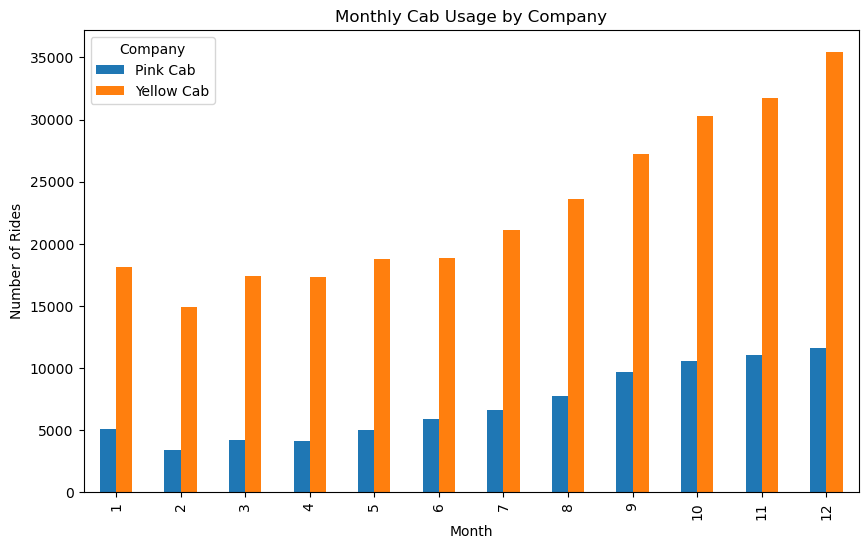

In [75]:
#Hypothesis 1
#Analyzing Seasonality in Cab Usage
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Grouping data by month and company for rides count
monthly_rides = master_data.groupby(['Month', 'Company'])['Transaction ID'].count().unstack()

# One-Way ANOVA to check for seasonality impacts
stat, pval = f_oneway(*[group.values for name, group in monthly_rides.iteritems()])
print('ANOVA test p-value for seasonality effect:', pval)

# Plotting the results
monthly_rides.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Cab Usage by Company')
plt.ylabel('Number of Rides')
plt.xlabel('Month')
plt.show()


The ANOVA test resulted in a very low p-value (approximately 1.70e-07), which suggests that there is a statistically significant effect of seasonality on cab usage.

The bar chart visualizes the number of rides per month for each company, with 'Pink Cab' and 'Yellow Cab' as the two companies in the dataset. We can see that the usage of Yellow Cab is consistently higher than Pink Cab throughout the year.

The increasing trend towards the end of the year for Yellow Cab could be due to a number of factors such as holidays, weather conditions, or special events, contributing to the seasonality observed in the data. For Pink Cab, while also increasing towards the end of the year, the difference between the months does not seem as pronounced as it is for Yellow Cab.

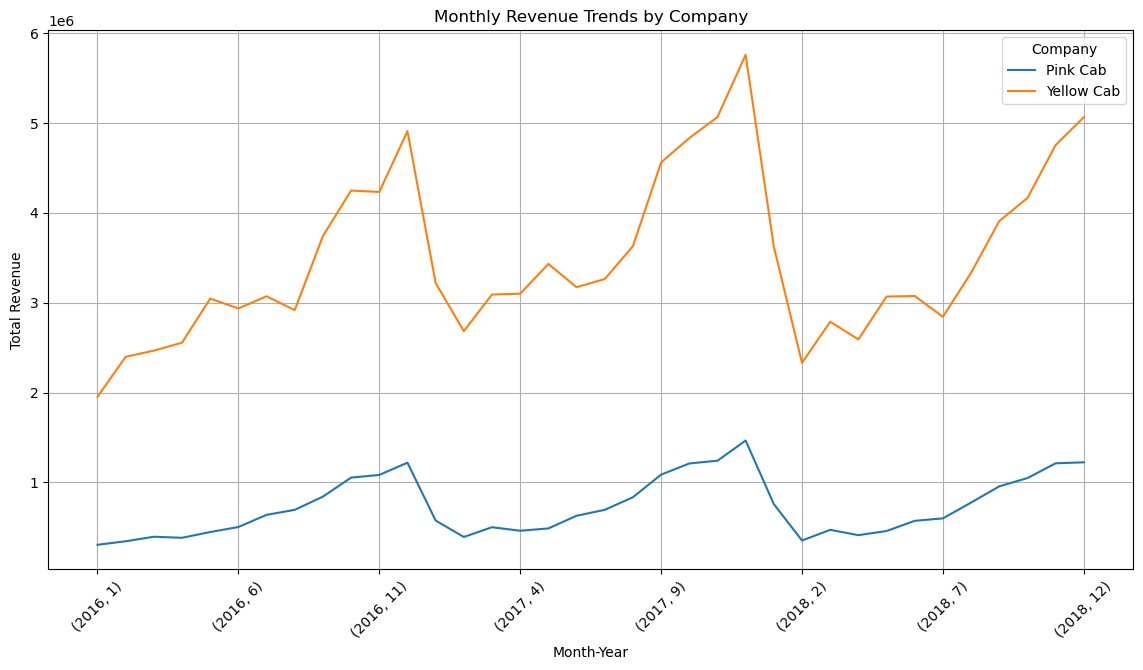

In [67]:
#Hypothesis 2
#Advanced Hypothesis: Seasonality Impact on Revenue
#Investigating whether there's a seasonality effect on the revenue of the cab companies.
# Convert 'Date of Travel' from Excel serial date to datetime

def excel_to_datetime(excel_serial):
    excel_epoch = datetime(1900, 1, 1)
    delta = timedelta(days=excel_serial - 2)  # Adjusting for the Excel leap year bug
    return excel_epoch + delta

cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(excel_to_datetime)
cab_data['Month'] = cab_data['Date of Travel'].dt.month
cab_data['Year'] = cab_data['Date of Travel'].dt.year

# Summing revenue by company, month, and year
monthly_revenue = cab_data.groupby(['Year', 'Month', 'Company'])['Price Charged'].sum().unstack()
monthly_revenue.plot(kind='line', figsize=(14, 7))
plt.title('Monthly Revenue Trends by Company')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.legend(title='Company')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


This visualization indicates some periodic fluctuations in revenue for both companies, suggesting that there could indeed be a seasonality component affecting their earnings.

Key observations from the chart:

Yellow Cab's revenue is significantly higher than Pink Cab's throughout the period shown.
Both companies experience peaks and troughs throughout the years, which may correspond to seasonal events or patterns in customer behavior.
For Yellow Cab, there are sharp increases in revenue at certain intervals, followed by decreases, indicating possible seasonal highs and lows.
Pink Cab's revenue also fluctuates, but the pattern does not seem as pronounced or as consistent as Yellow Cab's.

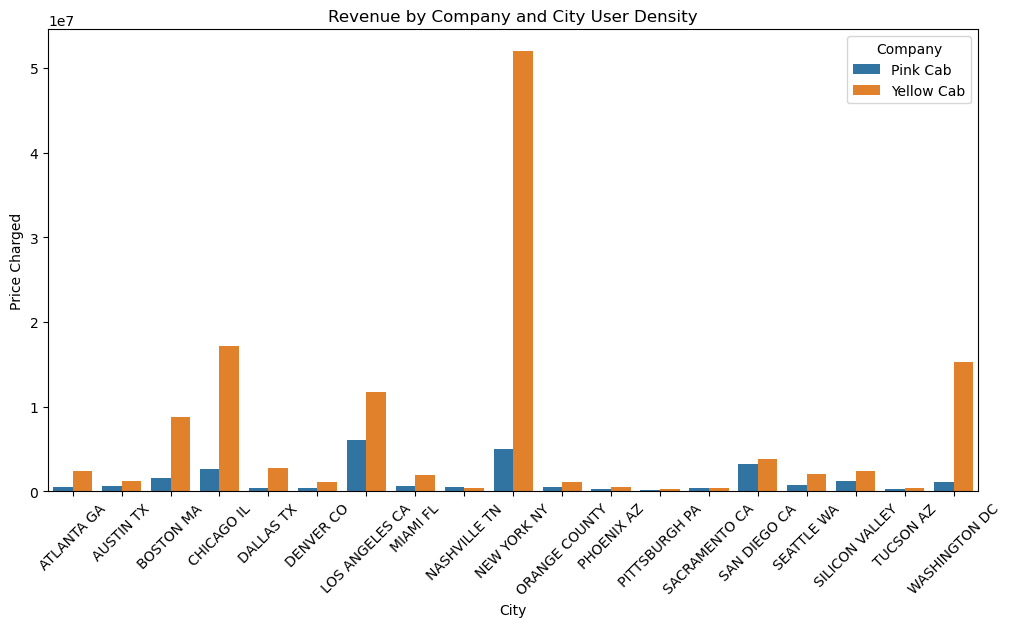

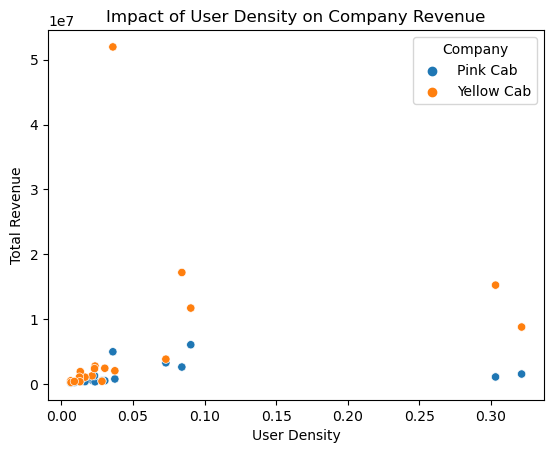

In [68]:
#Hypothesis 3 
#Hypothesis: Impact of City's Cab User Density on Cab Company Performance

import pandas as pd

# Convert population and user strings to integers (assuming data is loaded into DataFrame city_data)
city_data['Population'] = city_data['Population'].str.replace(',', '').astype(int)
city_data['Users'] = city_data['Users'].str.replace(',', '').astype(int)
city_data['User Density'] = city_data['Users'] / city_data['Population']


cab_data['Price Charged'] = cab_data['Price Charged'].astype(float)
cab_data['Cost of Trip'] = cab_data['Cost of Trip'].astype(float)

# Merging city data with cab data
full_data = pd.merge(cab_data, city_data[['City', 'User Density']], on='City', how='left')

# Group by company and city and calculate total revenue
company_performance = full_data.groupby(['Company', 'City'])['Price Charged'].sum().reset_index()

# Adding user density to the analysis
company_performance = pd.merge(company_performance, city_data[['City', 'User Density']], on='City', how='left')

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=company_performance, x='City', y='Price Charged', hue='Company')
plt.title('Revenue by Company and City User Density')
plt.xticks(rotation=45)
plt.show()

# Scatter plot to visualize relationship between user density and revenue
sns.scatterplot(data=company_performance, x='User Density', y='Price Charged', hue='Company')
plt.title('Impact of User Density on Company Revenue')
plt.xlabel('User Density')
plt.ylabel('Total Revenue')
plt.show()


The investigation explores the correlation between city cab user density and the performance of two prominent cab companies, Pink Cab and Yellow Cab. Data from city demographics have been merged with cab transaction details to evaluate the influence of the cab user base relative to the total city population on the revenue of each company.

The analysis presented in the bar plot reveals that Yellow Cab consistently achieves higher revenue across most cities when compared to Pink Cab. The scatter plot aims to delve deeper into the dynamics between user density and revenue generation. It appears that Yellow Cab's revenue data points are widely distributed across different user densities, indicating no apparent direct correlation. Pink Cab's revenue also does not exhibit a significant correlation with increased user density.

In [69]:
# Check the data type of 'Date of Travel' column
print(cab_data['Date of Travel'].dtype)

# Extract year, month, and day from 'Date of Travel'
cab_data['Year'] = cab_data['Date of Travel'].dt.year
cab_data['Month'] = cab_data['Date of Travel'].dt.month
cab_data['Day'] = cab_data['Date of Travel'].dt.day

# Optionally, extract the day of the week (0=Monday, 6=Sunday)
cab_data['DayOfWeek'] = cab_data['Date of Travel'].dt.dayofweek


datetime64[ns]


In [70]:
# Calculate profit for each ride
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']

# Group data by Year and Month to summarize rides and profit
monthly_summary = cab_data.groupby(['Year', 'Month']).agg(
    Total_Rides=('Transaction ID', 'count'),
    Total_Profit=('Profit', 'sum'),
    Average_Profit=('Profit', 'mean')
).reset_index()

# Display the summarized data
print(monthly_summary)


    Year  Month  Total_Rides  Total_Profit  Average_Profit
0   2016      1         4646  9.102610e+05      195.923585
1   2016      2         5724  1.096645e+06      191.587127
2   2016      3         6377  1.002566e+06      157.215927
3   2016      4         6600  1.028728e+06      155.867920
4   2016      5         7534  1.344324e+06      178.434347
5   2016      6         7397  1.321995e+06      178.720455
6   2016      7         8939  1.130668e+06      126.487041
7   2016      8         9190  9.816933e+05      106.821907
8   2016      9        10984  1.466762e+06      133.536248
9   2016     10        13031  1.613374e+06      123.810423
10  2016     11        12549  1.725599e+06      137.508882
11  2016     12        14348  2.017891e+06      140.639213
12  2017      1         8188  1.411670e+06      172.407204
13  2017      2         6553  1.189825e+06      181.569584
14  2017      3         7722  1.360119e+06      176.135542
15  2017      4         7859  1.312943e+06      167.0623

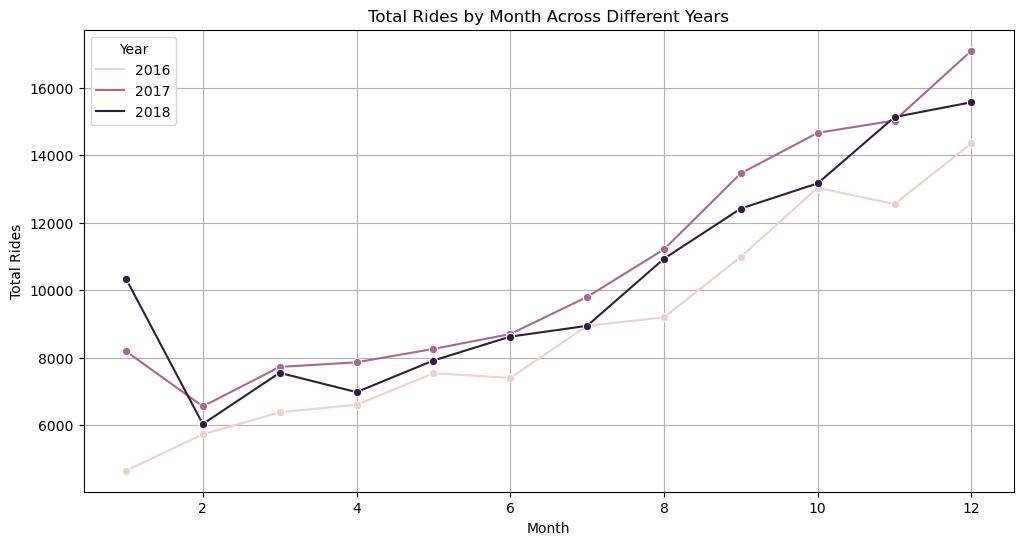

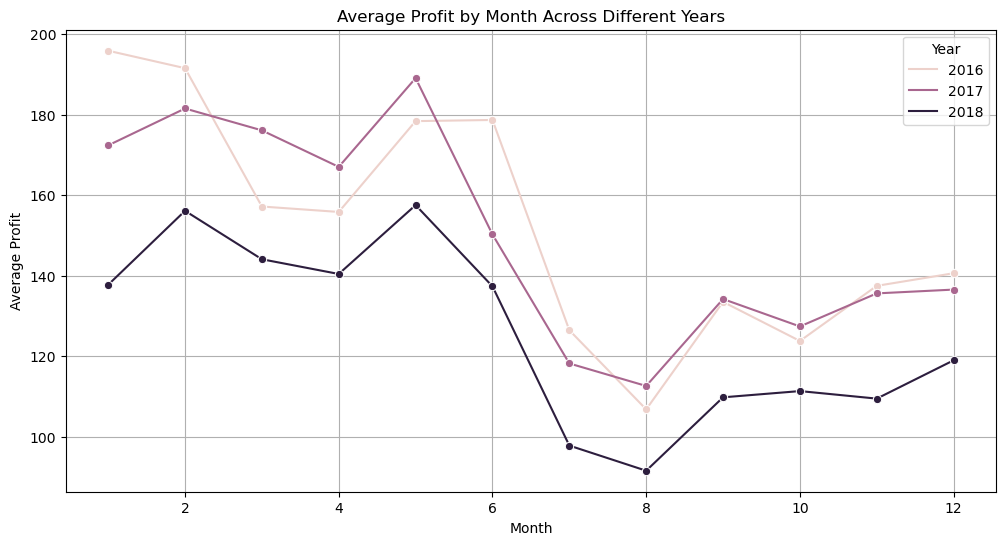

In [71]:
#Hypothesis 4
#Plotting Seasonality Trends
#Visualize the data to observe any seasonal trends in ride count or profit:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot total rides by month across years
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_summary, x='Month', y='Total_Rides', hue='Year', marker='o')
plt.title('Total Rides by Month Across Different Years')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# Plot average profit by month across years
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_summary, x='Month', y='Average_Profit', hue='Year', marker='o')
plt.title('Average Profit by Month Across Different Years')
plt.xlabel('Month')
plt.ylabel('Average Profit')
plt.legend(title='Year')
plt.grid(True)
plt.show()



The seasonal trends in ride count and profit across different years have been visualized to discern patterns in the data. The first plot illustrates total rides by month, segmented by year, displaying a general increase in rides as the year progresses, with noticeable peaks toward the end of each year. The consecutive years show an ascending trajectory in the number of rides, with 2018 reflecting the highest counts, indicating potential growth or increased demand for rides over time.

The second plot portrays average profit by month across the same years, revealing a different pattern. The average profit does not increase monotonically towards the year-end like the ride count does. Instead, there are fluctuations with peaks and troughs that vary by year. The year 2017 stands out with higher average profits in some months compared to 2016 and 2018, suggesting that factors beyond ride count, such as pricing strategies or operational efficiencies, may impact profitability.

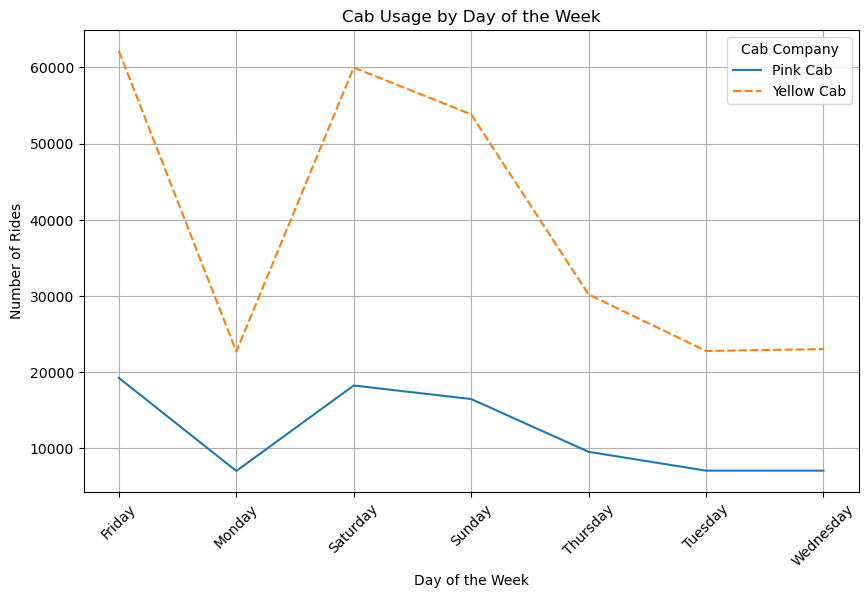

In [72]:
#Hypothesis 5
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Date of Travel' is already in datetime format
cab_data['Weekday'] = cab_data['Date of Travel'].dt.day_name()

# Group by Weekday
weekday_usage = cab_data.groupby(['Weekday', 'Company'])['Transaction ID'].count().unstack()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekday_usage)
plt.title('Cab Usage by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.legend(title='Cab Company')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



The provided line graph depicts cab usage by day of the week, comparing the number of rides for Pink Cab and Yellow Cab. It is evident from the graph that the number of rides for Yellow Cab is significantly higher than Pink Cab across all days. Notably, there is a peak in rides for Yellow Cab on Saturday, which then declines toward the beginning of the week, reaching its lowest on Wednesday. Conversely, Pink Cab shows a less pronounced variation throughout the week, maintaining a relatively flat trend with a slight increase on Fridays and a dip on Sundays.

This pattern may suggest that Yellow Cab is the preferred choice for weekend activities, which typically see a surge in cab usage, while Pink Cab's demand remains comparatively steady throughout the week. The data can be interpreted as indicating different customer usage behaviors for the two companies, potentially influenced by varying service offerings, pricing models, customer loyalty, or brand presence in different market segments.